In [1]:
# Load in libraries

import warnings
warnings.filterwarnings('ignore')
import datetime as dt

#libraries for handling data
import pandas as pd
import numpy as np
import math
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error

#label encoders
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()


#libraries for data visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
%matplotlib inline
import seaborn as sns
#sns.set_palette('Set2')
sns.set_color_codes("pastel")

#libaries for modelling
# Regression Modelling Algorithms
import statsmodels.api as sm
#from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor , GradientBoostingRegressor

In [2]:
filepath = "/Users/reejungkim/Documents/Git/Production analysis/Online Retail.xlsx"
pd.ExcelFile(filepath).sheet_names

['Online Retail']

In [3]:
df = pd.read_excel(filepath, sheet_name = 'Online Retail')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
df.CustomerID = df.CustomerID.astype(str)

In [6]:
df.describe()

,Quantity,UnitPrice
count,541909.000000,541909.000000
mean,9.552250,4.611114
std,218.081158,96.759853
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


In [7]:
df['TotalPurchase'] = df.Quantity * df.UnitPrice
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPurchase
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


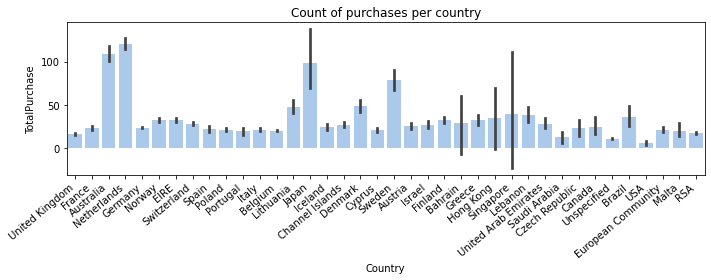

In [8]:
plt.figure(figsize=(10,4))

ax = sns.barplot(x='Country', y='TotalPurchase', color='b', data=df)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title('Count of purchases per country')
plt.tight_layout()
plt.show()

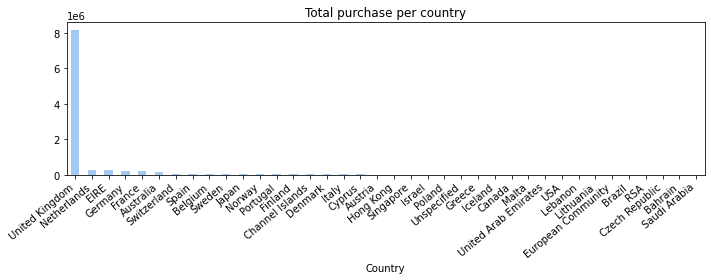

In [9]:
plt.figure(figsize=(10,4))

#ax = sns.barplot(x='Country', y='TotalPurchase', color='b', data=df, estimator=sum)
ax = df.groupby('Country')['TotalPurchase'].sum().sort_values( ascending=False).plot(kind='bar', color='b')

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title('Total purchase per country')
plt.tight_layout()
plt.show()

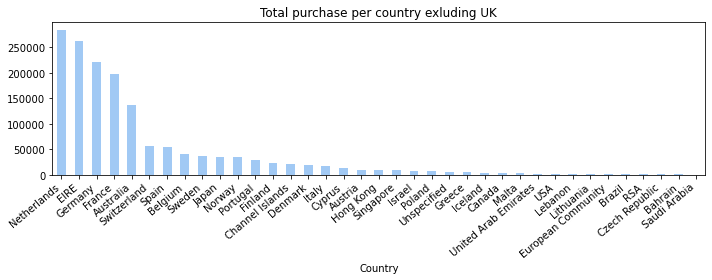

In [10]:
plt.figure(figsize=(10,4))

#ax = sns.barplot(x='Country', y='TotalPurchase', color='b', data=df, estimator=sum)
ax = df.loc[df.Country != 'United Kingdom'].groupby('Country')['TotalPurchase'].sum().sort_values( ascending=False).plot(kind='bar', color='b')

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title('Total purchase per country exluding UK')
plt.tight_layout()
plt.show()

In [11]:
df.groupby('Country')['TotalPurchase'].sum().sort_values(ascending=False)[:5]

Country
United Kingdom    8.187806e+06
Netherlands       2.846615e+05
EIRE              2.632768e+05
Germany           2.216982e+05
France            1.974039e+05
Name: TotalPurchase, dtype: float64

In [12]:
np.sort( df.Country.unique() )

array(['Australia', 'Austria', 'Bahrain', 'Belgium', 'Brazil', 'Canada',
       'Channel Islands', 'Cyprus', 'Czech Republic', 'Denmark', 'EIRE',
       'European Community', 'Finland', 'France', 'Germany', 'Greece',
       'Hong Kong', 'Iceland', 'Israel', 'Italy', 'Japan', 'Lebanon',
       'Lithuania', 'Malta', 'Netherlands', 'Norway', 'Poland',
       'Portugal', 'RSA', 'Saudi Arabia', 'Singapore', 'Spain', 'Sweden',
       'Switzerland', 'USA', 'United Arab Emirates', 'United Kingdom',
       'Unspecified'], dtype=object)

In [13]:
df['year-m'] = df['InvoiceDate'].dt.strftime('%Y-%m') #df['InvoiceDate'].apply(lambda x: x.strftime("%Y-%m"))

df.sort_values(by='InvoiceDate', ascending=True, inplace=True)

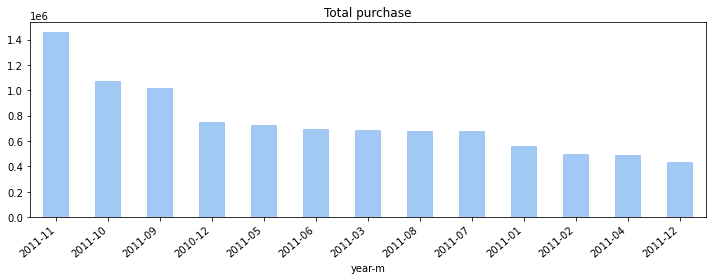

In [14]:
plt.figure(figsize=(10,4))

#ax = sns.barplot(x='year-m', y='TotalPurchase', color='b', data=df, estimator=sum)
ax = df.groupby('year-m')['TotalPurchase'].sum().sort_values( ascending=False).plot(kind='bar', color='b')

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title('Total purchase')
plt.tight_layout()
plt.show()

In [15]:
dfOrg = df

# Cohort Analysis

In [16]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPurchase,year-m
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12


In [17]:
cohort = pd.DataFrame(df.groupby('CustomerID')['InvoiceDate'].min() )
cohort

,InvoiceDate
CustomerID,
12346.0,2011-01-18 10:01:00
12347.0,2010-12-07 14:57:00
12348.0,2010-12-16 19:09:00
12349.0,2011-11-21 09:51:00
12350.0,2011-02-02 16:01:00
...,...
18281.0,2011-06-12 10:53:00
18282.0,2011-08-05 13:35:00
18283.0,2011-01-06 14:14:00


In [18]:
#fillna(df['InvoiceDate']) due to invoices without customer ID
df = df.merge(cohort, how='left', on='CustomerID', suffixes=('', '_Cohort')).fillna(df['InvoiceDate'])

In [19]:
df.loc[pd.isnull(df['InvoiceDate_Cohort'])]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPurchase,year-m,InvoiceDate_Cohort


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 541909 entries, 0 to 541908
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   InvoiceNo           541909 non-null  object        
 1   StockCode           541909 non-null  object        
 2   Description         540455 non-null  object        
 3   Quantity            541909 non-null  int64         
 4   InvoiceDate         541909 non-null  datetime64[ns]
 5   UnitPrice           541909 non-null  float64       
 6   CustomerID          541909 non-null  object        
 7   Country             541909 non-null  object        
 8   TotalPurchase       541909 non-null  float64       
 9   year-m              541909 non-null  object        
 10  InvoiceDate_Cohort  541909 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(1), object(6)
memory usage: 49.6+ MB


In [21]:
df['year-m_Cohort'] = pd.to_datetime(df['InvoiceDate_Cohort'], errors='coerce').dt.strftime('%Y-%m')

In [22]:
df.loc[df['year-m']==df['year-m_Cohort'], 'new_user'] =1
df.loc[df['year-m']!=df['year-m_Cohort'], 'new_user'] =0
df['new_user'] = df['new_user'].astype(int)

plt.figure(figsize=(10,4))
#ax = df.loc[df.new_user==1].groupby('year-m_Cohort')['CustomerID'].count().plot(kind='bar', color='g') 
ax = sns.countplot(x='year-m', data=df.loc[df.new_user==1], palette=["C2"]) #color='b')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title('New User acquisition')
plt.tight_layout()
plt.show()

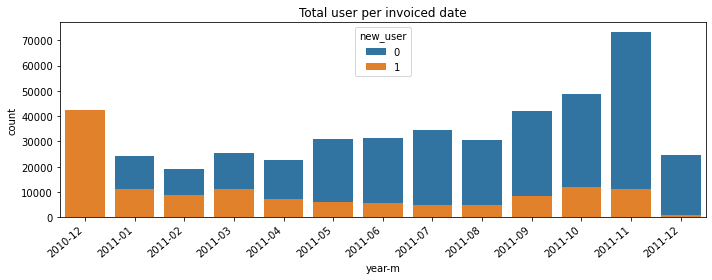

In [24]:
plt.figure(figsize=(10,4))
ax = sns.countplot(x='year-m', hue='new_user', data=df, dodge=False,palette=["C0", "C1"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right" )
plt.title('Total user per invoiced date')
plt.tight_layout()
plt.show()

In [25]:
df['cohort index'] = ( df['InvoiceDate'] - df['InvoiceDate_Cohort'] ) /np.timedelta64(1, 'M')  
df['cohort index'] = df['cohort index'].astype(int)

df.pivot_table(index='year-m_Cohort', 
               columns='year-m', 
               values='CustomerID', 
               aggfunc='count').fillna("")

## Cohort Retention count

In [27]:
cohort_counts = df.pivot_table(index='year-m_Cohort', 
               columns='cohort index', 
               values='CustomerID', 
               aggfunc='count')#.fillna("")

cohort_counts

cohort index,0,1,2,3,4,5,6,7,8,9,10,11,12
year-m_Cohort,,,,,,,,,,,,,
2010-12,44151.0,23376.0,18637.0,21041.0,16640.0,21365.0,20406.0,23577.0,20122.0,23798.0,25686.0,43596.0,9957.0
2011-01,12223.0,2793.0,3052.0,3233.0,3142.0,3283.0,2779.0,3655.0,4635.0,5550.0,4581.0,121.0,NaN
2011-02,9363.0,2199.0,1990.0,2460.0,1771.0,2344.0,2186.0,2565.0,3471.0,1770.0,17.0,NaN,NaN
2011-03,11950.0,1713.0,2464.0,2546.0,2220.0,2283.0,3257.0,3725.0,3205.0,283.0,NaN,NaN,NaN
2011-04,7683.0,1845.0,996.0,1425.0,1296.0,2006.0,2443.0,1647.0,206.0,NaN,NaN,NaN,NaN
2011-05,6510.0,1057.0,952.0,1157.0,2163.0,1620.0,2099.0,49.0,NaN,NaN,NaN,NaN,NaN
2011-06,6122.0,783.0,989.0,1637.0,1978.0,2087.0,90.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,5367.0,831.0,1416.0,1448.0,1594.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,5889.0,2404.0,3480.0,1196.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Cohort retention %

In [31]:
cohort_retentions = cohort_counts.divide( cohort_counts[0], axis=0).round(4)
cohort_retentions

cohort index,0,1,2,3,4,5,6,7,8,9,10,11,12
year-m_Cohort,,,,,,,,,,,,,
2010-12,1.0,0.5295,0.4221,0.4766,0.3769,0.4839,0.4622,0.5340,0.4558,0.5390,0.5818,0.9874,0.2255
2011-01,1.0,0.2285,0.2497,0.2645,0.2571,0.2686,0.2274,0.2990,0.3792,0.4541,0.3748,0.0099,NaN
2011-02,1.0,0.2349,0.2125,0.2627,0.1891,0.2503,0.2335,0.2740,0.3707,0.1890,0.0018,NaN,NaN
2011-03,1.0,0.1433,0.2062,0.2131,0.1858,0.1910,0.2726,0.3117,0.2682,0.0237,NaN,NaN,NaN
2011-04,1.0,0.2401,0.1296,0.1855,0.1687,0.2611,0.3180,0.2144,0.0268,NaN,NaN,NaN,NaN
2011-05,1.0,0.1624,0.1462,0.1777,0.3323,0.2488,0.3224,0.0075,NaN,NaN,NaN,NaN,NaN
2011-06,1.0,0.1279,0.1615,0.2674,0.3231,0.3409,0.0147,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,1.0,0.1548,0.2638,0.2698,0.2970,0.0002,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,1.0,0.4082,0.5909,0.2031,0.0031,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
np.sort( df.Country.unique())

array(['Australia', 'Austria', 'Bahrain', 'Belgium', 'Brazil', 'Canada',
       'Channel Islands', 'Cyprus', 'Czech Republic', 'Denmark', 'EIRE',
       'European Community', 'Finland', 'France', 'Germany', 'Greece',
       'Hong Kong', 'Iceland', 'Israel', 'Italy', 'Japan', 'Lebanon',
       'Lithuania', 'Malta', 'Netherlands', 'Norway', 'Poland',
       'Portugal', 'RSA', 'Saudi Arabia', 'Singapore', 'Spain', 'Sweden',
       'Switzerland', 'USA', 'United Arab Emirates', 'United Kingdom',
       'Unspecified'], dtype=object)

# Export cohort size and retention rate per country to excel file

In [77]:
writer = pd.ExcelWriter('Output Cohort analysis.xlsx', engine='xlsxwriter')
#os.chdir(folder)

#export cohort sizes
cohort_counts.to_excel(writer, sheet_name='COHORT SIZE', index=True)
#export cohort retention rates
cohort_retention = cohort_retentions.fillna("")*100
cohort_retention.to_excel(writer, sheet_name='COHORT RETENTION', index=True)


for country in np.sort( df.Country.unique() ):
    tbl_size = df.loc[df.Country== country].pivot_table(index='year-m_Cohort', 
               columns='cohort index', 
               values='CustomerID', 
               aggfunc='count')#.fillna("")
    tbl_size.to_excel(writer, sheet_name=country+' size', index=True)

    #print(country)
    tbl_retention = (tbl_size.divide( tbl_size[ tbl_size.columns.min() ], axis=0).round(4)*100).fillna("")
    tbl_retention.to_excel(writer, sheet_name=country + " retention", index=True)

writer.save()

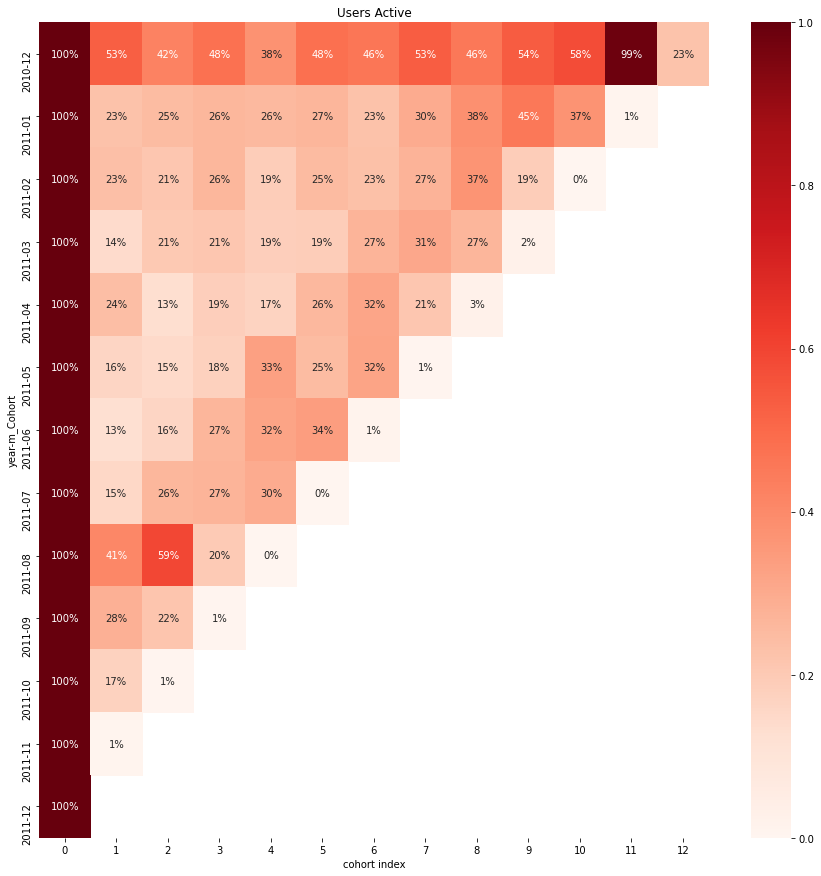

In [78]:
# User Count heatmap
plt.figure(figsize=(15,15))
plt.title('Users Active')
ax = sns.heatmap(data=cohort_retentions, annot=True, vmin=0.0,cmap='Reds', fmt='.0%')
ax.set_yticklabels(cohort_counts.index)
fig=ax.get_figure()
#fig.savefig("Retention Counts.png")

plt.show()

# Feature engineering for CLV

In [79]:
def getAggValuePerCustomer(dataframe):
    data = dataframe.groupby(['CustomerID', 'Country']).agg({
                                        'InvoiceDate': lambda date: (date.max() - date.min()).days,
                                        'InvoiceNo': lambda num: len(num),
                                        'Quantity': lambda quant: quant.sum(),
                                        'TotalPurchase': lambda price: price.sum()})
    data.columns = ['num_days','num_transactions','num_units','spent_money']
    data['avg_order_value'] = data['spent_money']/data['num_transactions']
    data['profit_margin'] = data['spent_money']*0.05   #assume the business has approx 5% profit on the total sale.
    return data

In [80]:
df = getAggValuePerCustomer(df).reset_index()

In [81]:
#Create data frames for each country

df_name_list = list()

for i in df.Country.unique():
    df_name = "data_" + str(i).replace(" ", "_")
    #print(df_name)
    df_name_list.append(df_name)
    globals()[df_name] = df.loc[df.Country == i]
    
df_name_list

['data_United_Kingdom',
 'data_Iceland',
 'data_Finland',
 'data_Italy',
 'data_Norway',
 'data_Bahrain',
 'data_Spain',
 'data_Portugal',
 'data_Switzerland',
 'data_Austria',
 'data_Cyprus',
 'data_Belgium',
 'data_Unspecified',
 'data_Denmark',
 'data_Australia',
 'data_France',
 'data_Germany',
 'data_RSA',
 'data_Greece',
 'data_Sweden',
 'data_Israel',
 'data_USA',
 'data_Saudi_Arabia',
 'data_Poland',
 'data_United_Arab_Emirates',
 'data_Singapore',
 'data_Japan',
 'data_Netherlands',
 'data_Lebanon',
 'data_Brazil',
 'data_Czech_Republic',
 'data_EIRE',
 'data_Channel_Islands',
 'data_European_Community',
 'data_Lithuania',
 'data_Canada',
 'data_Malta',
 'data_Hong_Kong']

In [82]:
data_United_Kingdom.head(2)

,CustomerID,Country,num_days,num_transactions,num_units,spent_money,avg_order_value,profit_margin
0,12346.0,United Kingdom,0,2,0,0.00,0.000000,0.0000
337,12747.0,United Kingdom,366,103,1275,4196.01,40.737961,209.8005


#CLTV = ((Average Order Value x Purchase Frequency)/Churn Rate) x Profit margin.
#Customer Value = Average Order Value * Purchase Frequency

In [83]:
def getChurnRates(dataframe):
    purchase_frequency=sum(dataframe['num_transactions'])/dataframe.shape[0]
    repeat_rate =  dataframe[dataframe.num_transactions > 1].shape[0]/dataframe.shape[0]
    churn_rate = churn_rate=1-repeat_rate
    return [ purchase_frequency, repeat_rate, churn_rate]

In [84]:
getChurnRates(data_United_Kingdom)

[125.40572007086813, 0.9807643634522906, 0.019235636547709434]

In [85]:
getChurnRates(data_France)

[97.23863636363636, 1.0, 0.0]

In [86]:
def getCustomerValue(dataframe, purchase_frequency, churn_rate):
    dataframe['CLV'] = dataframe['avg_order_value'] * purchase_frequency / churn_rate
    dataframe['cust_lifetime_value'] = dataframe['CLV'] * dataframe['profit_margin']
    return dataframe

In [87]:
for country in df_name_list:
    indicators = getChurnRates( globals()[country] )
    purchase_frequency = indicators[0]
    churn_rate = indicators[1]
    globals()[country] = getCustomerValue( globals()[country], purchase_frequency, churn_rate )
    

In [88]:
data_United_Kingdom.head(2)

,CustomerID,Country,num_days,num_transactions,num_units,spent_money,avg_order_value,profit_margin,CLV,cust_lifetime_value
0,12346.0,United Kingdom,0,2,0,0.00,0.000000,0.0000,0.000000,0.000000e+00
337,12747.0,United Kingdom,366,103,1275,4196.01,40.737961,209.8005,5208.971232,1.092845e+06


In [89]:
data_France.head(2)

,CustomerID,Country,num_days,num_transactions,num_units,spent_money,avg_order_value,profit_margin,CLV,cust_lifetime_value
55,12413.0,France,270,40,282,694.15,17.353750,34.7075,1687.454986,58567.343919
81,12437.0,France,329,201,2918,4896.66,24.361493,244.8330,2368.878314,579979.584279


# Life Time Value per User Country

In [90]:
CLV_per_Country = pd.DataFrame()

for country in df_name_list:
    temp = globals()[country].groupby('Country').agg(sum)
    CLV_per_Country = CLV_per_Country.append(temp)
    
CLV_per_Country.sort_values(by='Country', ascending=True, inplace=True)

CLV_per_Country

,num_days,num_transactions,num_units,spent_money,avg_order_value,profit_margin,CLV,cust_lifetime_value
Country,,,,,,,,
Australia,2007,1259,83653,137077.270,386.699665,6853.8635,5.409499e+04,1.405368e+08
Austria,806,401,4827,10154.320,386.367227,507.7160,1.408484e+04,6.867254e+05
Bahrain,16,19,260,548.400,57.588462,27.4200,3.647269e+02,5.768001e+03
Belgium,3750,2069,23152,40910.960,503.969730,2045.5480,4.170853e+04,3.496423e+06
Brazil,0,32,356,1143.600,35.737500,57.1800,1.143600e+03,6.539105e+04
Canada,25,151,2763,3666.380,580.384074,183.3190,2.921267e+04,8.857348e+05
Channel Islands,1264,758,9479,20086.290,711.937492,1004.3145,5.996096e+04,5.202913e+06
Cyprus,648,622,6317,12946.290,203.221122,647.3145,1.580044e+04,1.257057e+06
Czech Republic,263,30,592,707.720,23.590667,35.3860,7.077200e+02,2.504338e+04


# Total life time value

In [91]:
totValue  = CLV_per_Country['cust_lifetime_value'].sum()
totValue

6815855087.69822

In [92]:
import locale
locale.setlocale( locale.LC_ALL, '' )

'en_GB.UTF-8'

In [93]:
totValue = locale.currency(totValue , grouping=True) 
print("Total customer lifetime value ",  totValue )

Total customer lifetime value  £6,815,855,087.70


# Feature engineer to get time series revenue per country

In [94]:
dfOrg.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPurchase,year-m
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12


In [95]:
dfTimeSeries = dfOrg.pivot_table(index=['Country'],columns=['year-m'],
                           values='TotalPurchase',aggfunc='sum',fill_value=0)

dfTimeSeries.sort_values(by='Country', ascending=True, inplace = True)

dfTimeSeries

year-m,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12
Country,,,,,,,,,,,,,
Australia,1005.10,9017.71,14627.47,17055.29,333.400,13628.51,25164.77,4767.570,22489.20,5031.730,17150.53,6805.99,0.00
Austria,257.04,0.00,518.36,1708.12,680.780,1249.43,-24.20,1191.950,1516.08,0.000,1043.78,1329.78,683.20
Bahrain,205.74,-205.74,0.00,0.00,0.000,548.40,0.00,0.000,0.00,0.000,0.00,0.00,0.00
Belgium,1809.91,1154.05,2161.32,3333.58,1954.150,2727.00,4273.17,2473.620,3536.12,4197.820,5651.38,6229.41,1409.43
Brazil,0.00,0.00,0.00,0.00,1143.600,0.00,0.00,0.000,0.00,0.000,0.00,0.00,0.00
Canada,0.00,0.00,0.00,140.54,0.000,534.24,1171.46,1768.580,51.56,0.000,0.00,0.00,0.00
Channel Islands,363.53,645.08,1784.71,3509.33,293.000,903.79,2060.03,0.000,4892.53,1321.650,2623.32,1495.17,194.15
Cyprus,1590.82,547.50,4013.55,938.39,-35.800,0.00,1109.32,0.000,0.00,196.350,4216.52,460.89,-91.25
Czech Republic,0.00,0.00,549.26,0.00,-57.510,0.00,0.00,0.000,0.00,0.000,277.48,-61.51,0.00


# Time series customer lifetime value forecasting

In [96]:
X = dfTimeSeries
y = CLV_per_Country.cust_lifetime_value

In [97]:
#split training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)

In [98]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# make predictions on the testing set
y_pred = linreg.predict(X_test)

In [99]:
linreg.intercept_

-7372921.737272501

In [100]:
linreg.coef_

array([-2037.98477414,  8837.30312938, 16977.86049227,  3522.21727175,
       11004.91424857, -4475.66299341, -4667.99373609, -4469.50154092,
        5816.16607057, 12535.78640963, -9640.4396992 , -9810.89742811,
        8729.04337653])

In [101]:
from sklearn import metrics

# compute the R Square for model
print("R-Square:",metrics.r2_score(y_test, y_pred))

R-Square: 0.29266975293522735


In [102]:
#calculate MAE using scikit-learn
print("MAE:",metrics.mean_absolute_error(y_test,y_pred))

#calculate mean squared error
print("MSE",metrics.mean_squared_error(y_test, y_pred))
# compute the RMSE of our predictions
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 112750419.34903848
MSE 1.0188923774241405e+17
RMSE: 319200936.31193197


In [103]:
y_pred

array([-1.07581367e+07, -4.94746504e+06,  2.87632598e+07,  2.85047227e+07,
       -1.02686685e+07, -5.00939881e+06,  1.35713229e+06,  2.60518487e+08,
        1.03041036e+07, -1.20648571e+07])